## Train autoencoder for Clustering

In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import pandas as pd

## Load dataset

In [2]:
mydata = pd.read_csv("flu data with GeneXpert positive  20211228.csv",encoding='unicode_escape')
mydata=pd.DataFrame(mydata)
mydata

,GeneXpert,age,heightcm,weightkg,BMI,as_edenroll_temp,pulse,rr,sbp,o2s,...,pastmedreproductiveother,pastmedhiv,pastmedhivcd4,pastmedautoimm,pastmedcancer,pastmedcancerchemo,chemomeds,pastmedcancerrad,pastmedorgtransp,pastmedothermed
0,1,29.0,154.9400,77.110300,32.120721,36.40,86.0,16.0,113.0,97.00,...,0,0,0,0,0,0,0,0,0,0
1,1,40.0,182.8800,77.110300,23.055788,38.60,85.0,16.0,114.0,96.00,...,0,0,0,0,0,0,0,0,0,0
2,1,54.0,175.2600,92.532360,30.125067,39.20,124.0,15.0,138.0,100.00,...,0,1,0,0,0,0,0,0,1,0
3,1,55.0,187.9600,79.378250,22.468322,35.00,62.0,18.0,132.0,100.00,...,0,0,0,0,0,0,0,0,0,0
4,1,28.0,167.6400,122.469300,43.578465,36.80,108.0,18.0,142.0,96.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1,53.0,175.2600,89.357230,29.091364,35.70,82.0,22.0,116.0,87.00,...,0,1,1,0,0,0,0,0,0,0
1100,1,60.0,160.0200,68.945680,26.925175,35.70,109.0,16.0,112.0,98.00,...,0,0,0,0,0,0,0,0,0,1
1101,1,43.0,170.1800,104.325700,36.022535,35.30,113.0,23.0,145.0,78.00,...,0,1,1,0,0,0,0,0,0,0
1102,1,68.0,166.5700,59.497400,27.270000,35.30,68.0,18.0,128.0,96.39,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Choose all predictors except target & IDcols
predictors = [x for x in mydata.columns if x not in ['GeneXpert',]]

In [4]:
X_train=mydata[predictors]
X_train

,age,heightcm,weightkg,BMI,as_edenroll_temp,pulse,rr,sbp,o2s,cursympt_days,...,pastmedreproductiveother,pastmedhiv,pastmedhivcd4,pastmedautoimm,pastmedcancer,pastmedcancerchemo,chemomeds,pastmedcancerrad,pastmedorgtransp,pastmedothermed
0,29.0,154.9400,77.110300,32.120721,36.40,86.0,16.0,113.0,97.00,2.0,...,0,0,0,0,0,0,0,0,0,0
1,40.0,182.8800,77.110300,23.055788,38.60,85.0,16.0,114.0,96.00,1.0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,175.2600,92.532360,30.125067,39.20,124.0,15.0,138.0,100.00,1.0,...,0,1,0,0,0,0,0,0,1,0
3,55.0,187.9600,79.378250,22.468322,35.00,62.0,18.0,132.0,100.00,7.0,...,0,0,0,0,0,0,0,0,0,0
4,28.0,167.6400,122.469300,43.578465,36.80,108.0,18.0,142.0,96.00,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,53.0,175.2600,89.357230,29.091364,35.70,82.0,22.0,116.0,87.00,3.0,...,0,1,1,0,0,0,0,0,0,0
1100,60.0,160.0200,68.945680,26.925175,35.70,109.0,16.0,112.0,98.00,3.0,...,0,0,0,0,0,0,0,0,0,1
1101,43.0,170.1800,104.325700,36.022535,35.30,113.0,23.0,145.0,78.00,6.0,...,0,1,1,0,0,0,0,0,0,0
1102,68.0,166.5700,59.497400,27.270000,35.30,68.0,18.0,128.0,96.39,3.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=mydata['GeneXpert']
y

0       1
1       1
2       1
3       1
4       1
       ..
1099    1
1100    1
1101    1
1102    1
1103    1
Name: GeneXpert, Length: 1104, dtype: int64

### Number of input columns

In [6]:
n_inputs = X_train.shape[1]
n_inputs

117

### Scale data

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense 
import pandas as pd 
import random 
from sklearn.preprocessing import StandardScaler

In [8]:
# Scale data to have zero mean and unit variance 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)

In [9]:
X_train

array([[-8.88348595e-01, -1.18919824e+00,  6.04910596e-02, ...,
        -5.21995751e-02, -1.72773685e-01, -4.83238609e-01],
       [-1.76647645e-01,  1.66715958e+00,  6.04910596e-02, ...,
        -5.21995751e-02, -1.72773685e-01, -4.83238609e-01],
       [ 7.29153564e-01,  8.88152898e-01,  7.47465502e-01, ...,
        -5.21995751e-02,  5.78791845e+00, -4.83238609e-01],
       ...,
       [ 1.74526139e-02,  3.68815113e-01,  1.27279890e+00, ...,
        -5.21995751e-02, -1.72773685e-01, -4.83238609e-01],
       [ 1.63495477e+00, -2.41856104e-04, -7.24074164e-01, ...,
        -5.21995751e-02, -1.72773685e-01, -4.83238609e-01],
       [ 7.93853650e-01, -9.78866439e-01, -3.34627980e-02, ...,
        -5.21995751e-02, -1.72773685e-01, -4.83238609e-01]])

In [10]:
def plot_orig_vs_recon(title='', n_samples=3): 
    fig = plt.figure(figsize=(15,8)) 
    plt.suptitle(title) 
    for i in range(5): 
        plt.subplot(5, 1, i+1) 
        idx = random.sample(range(X_train.shape[0]), 1) 
        plt.plot(autoencoder.predict(X_train[idx]).squeeze(), label='reconstructed' if i == 0 else '') 
        plt.plot(X_train[idx].squeeze(), label='original' if i == 0 else '') 
        fig.axes[i].set_xticklabels(predictors) 
        plt.xticks(np.arange(0, 10, 1)) 
        plt.grid(True) 
        if i == 0: plt.legend();

In [11]:
import warnings
warnings.filterwarnings("ignore")

### Number of Latent sapce == 5

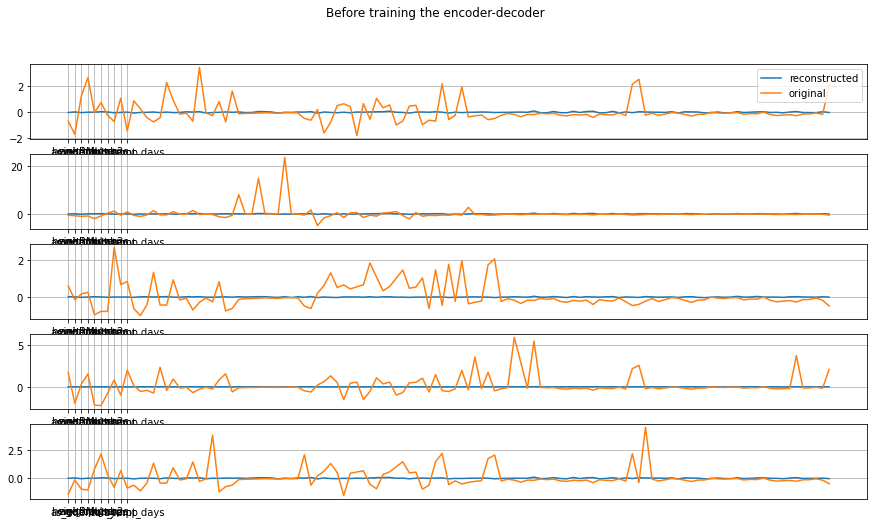

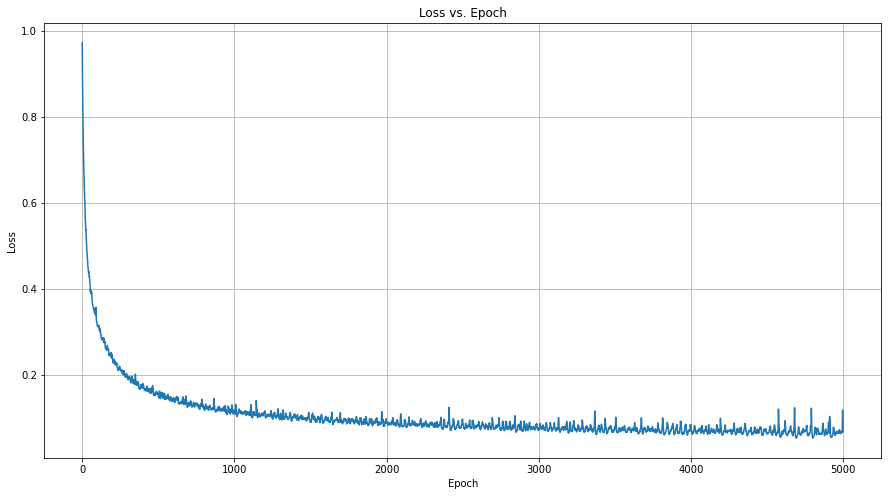

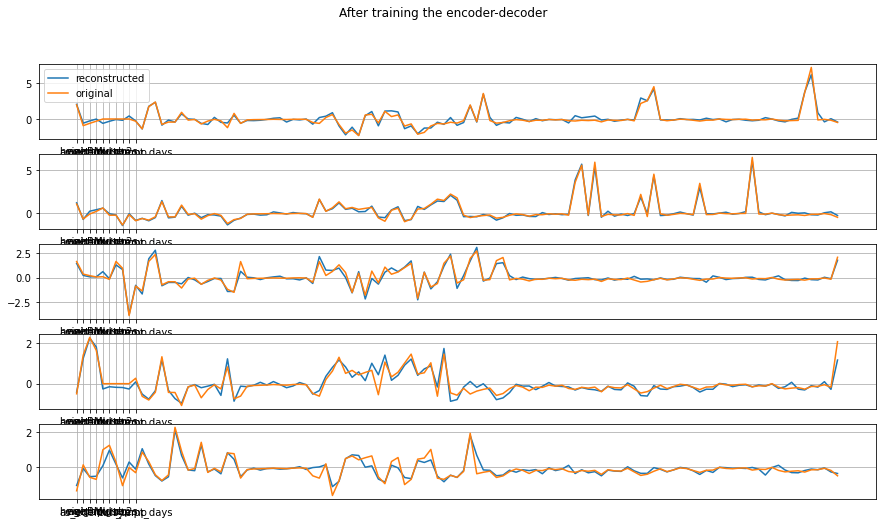

In [12]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 5 
encoder_5 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_5 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_5.input, outputs=decoder_5(encoder_5.output)) 
autoencoder.compile(loss='mse', optimizer='adam')
plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 10

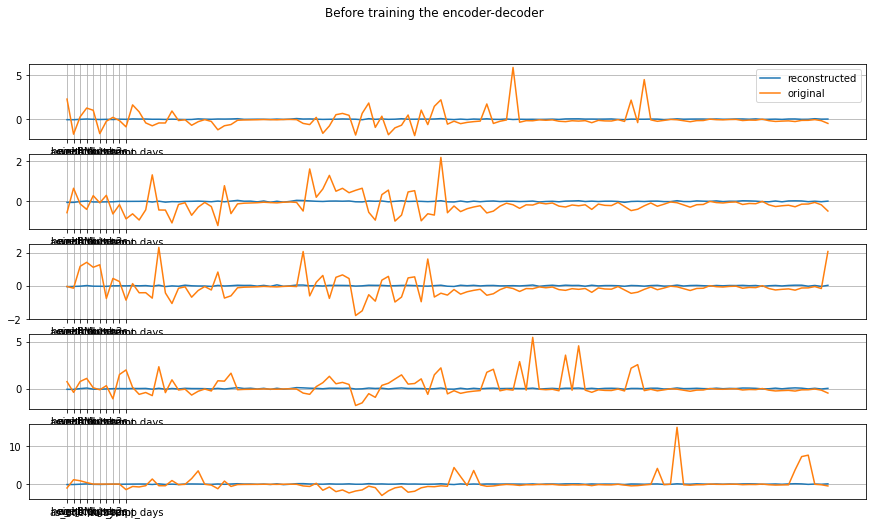

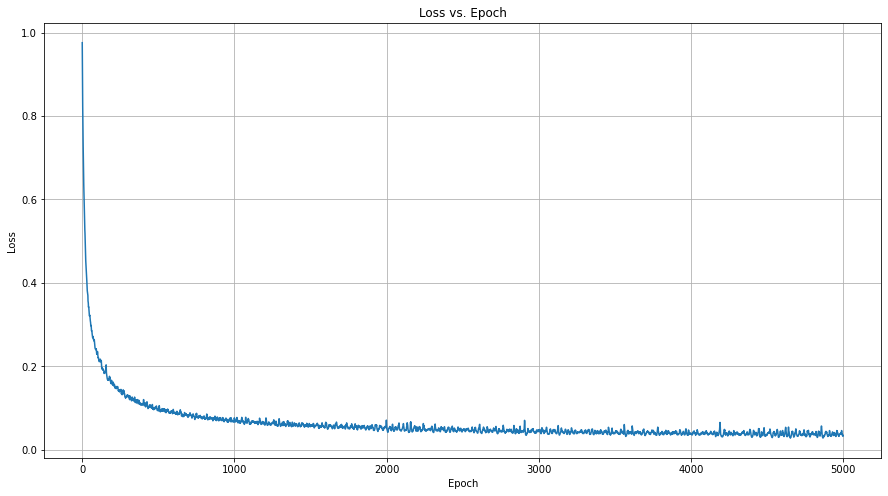

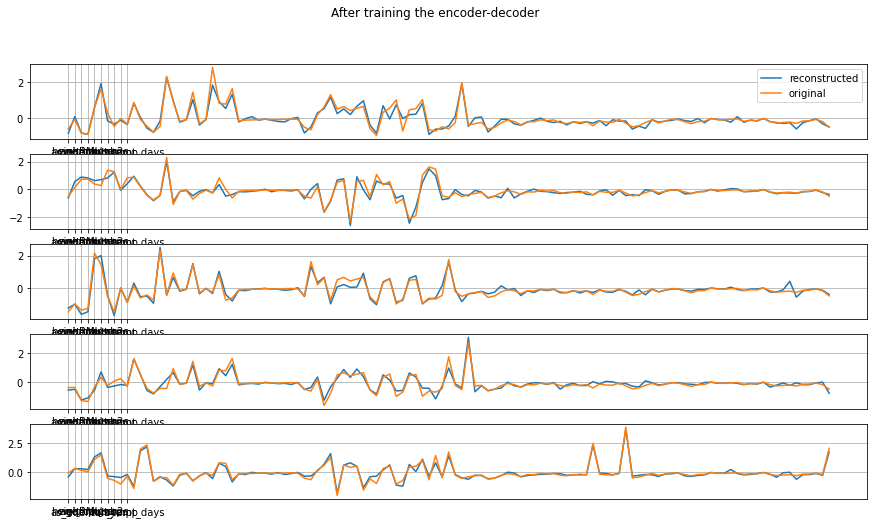

In [13]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 10 
encoder_10 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_10 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_10.input, outputs=decoder_10(encoder_10.output)) 
autoencoder.compile(loss='mse', optimizer='adam')

plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 15

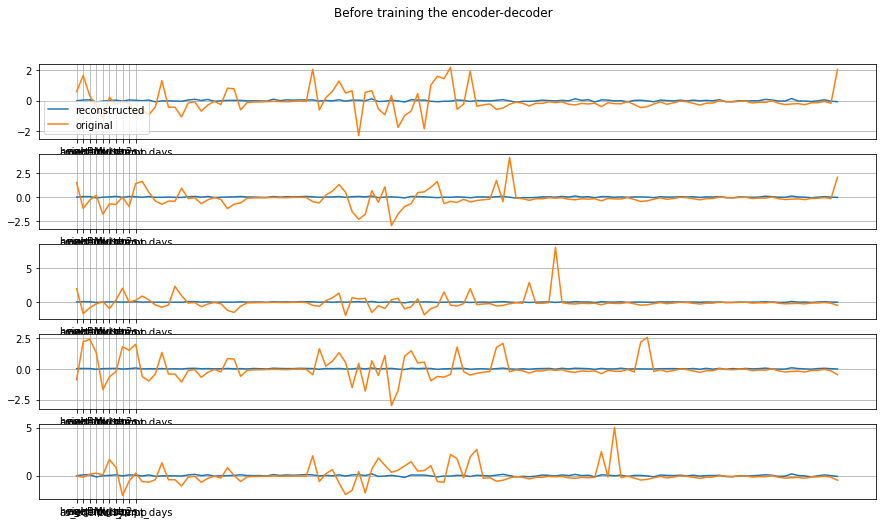

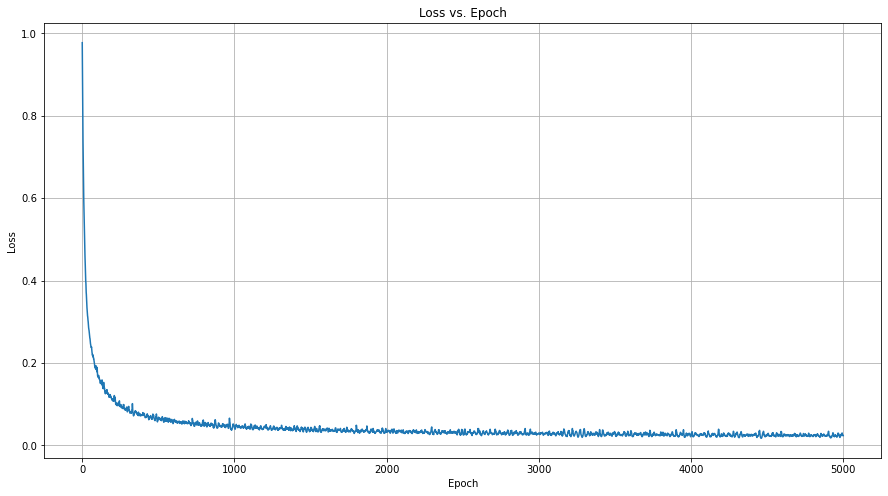

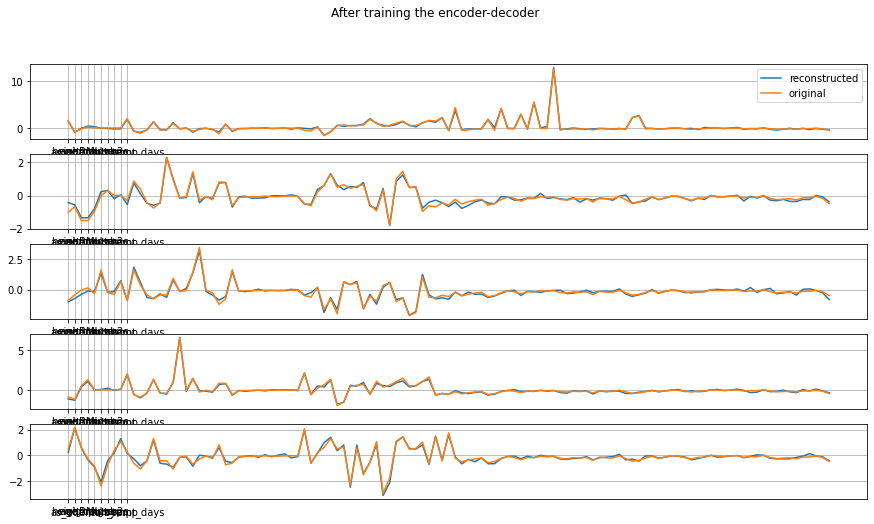

In [14]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 15 
encoder_15 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_15 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_15.input, outputs=decoder_15(encoder_15.output)) 
autoencoder.compile(loss='mse', optimizer='adam')

plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 20

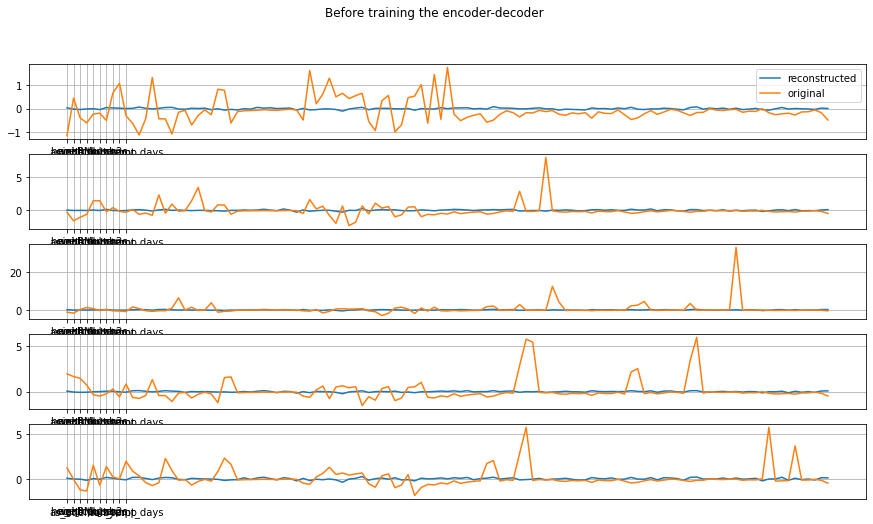

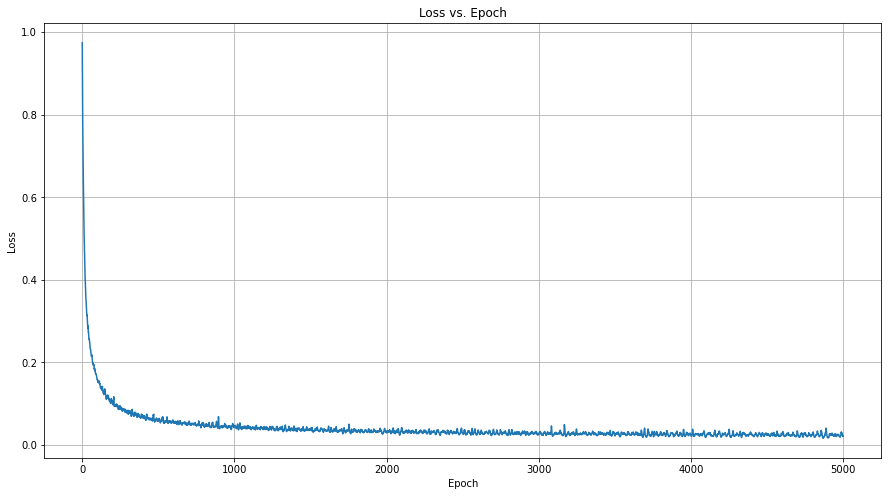

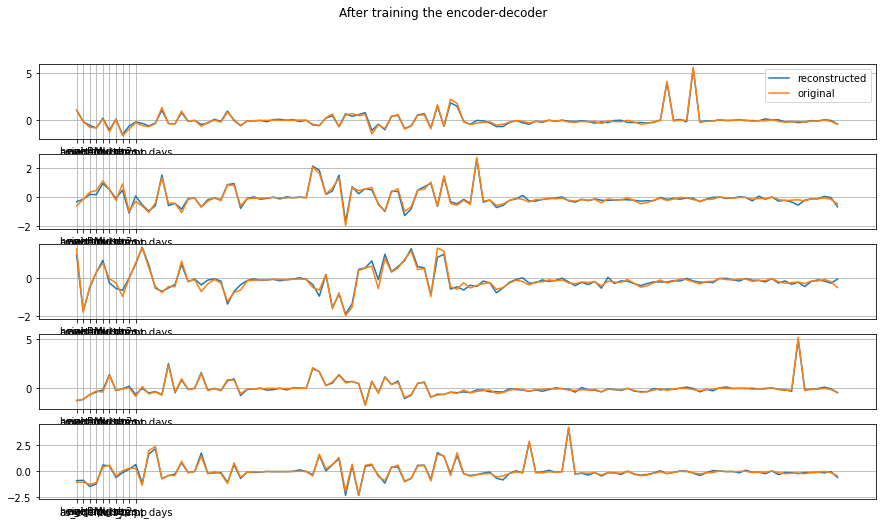

In [15]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 20 
encoder_20 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_20 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_20.input, outputs=decoder_20(encoder_20.output)) 
autoencoder.compile(loss='mse', optimizer='adam')

plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 25

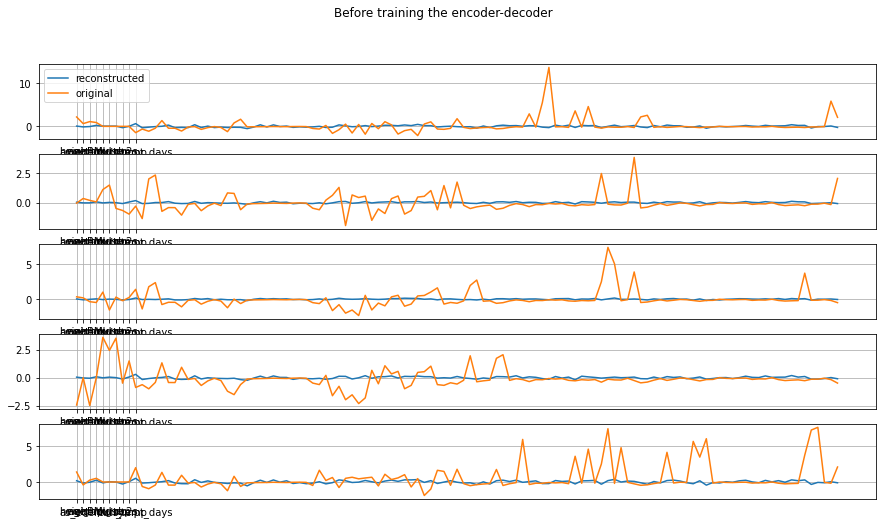

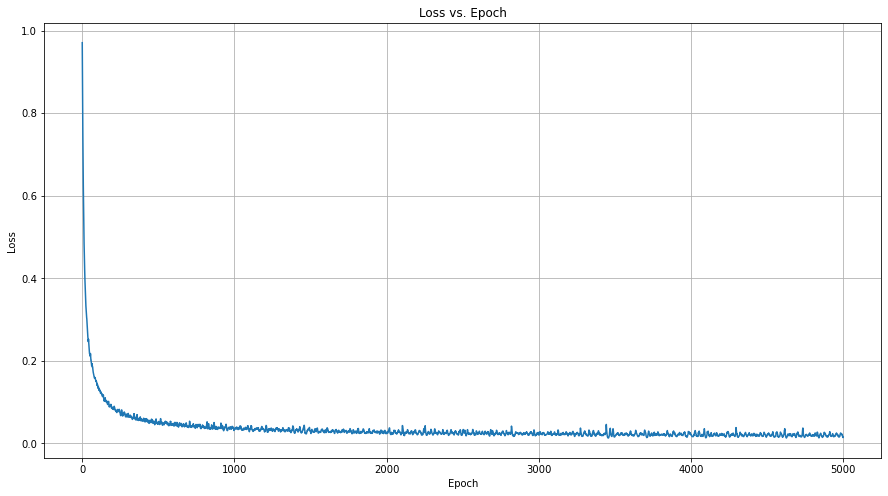

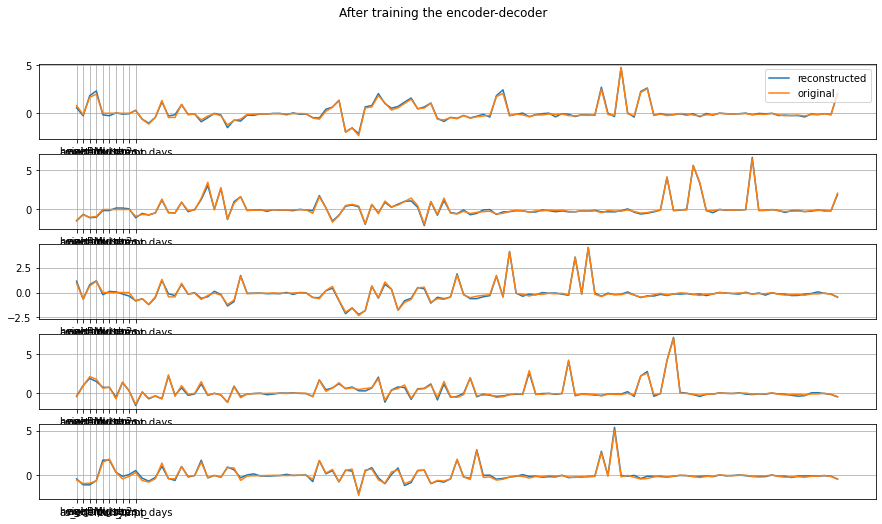

In [16]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 25 
encoder_25 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_25 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_25.input, outputs=decoder_25(encoder_25.output)) 
autoencoder.compile(loss='mse', optimizer='adam')

plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 30

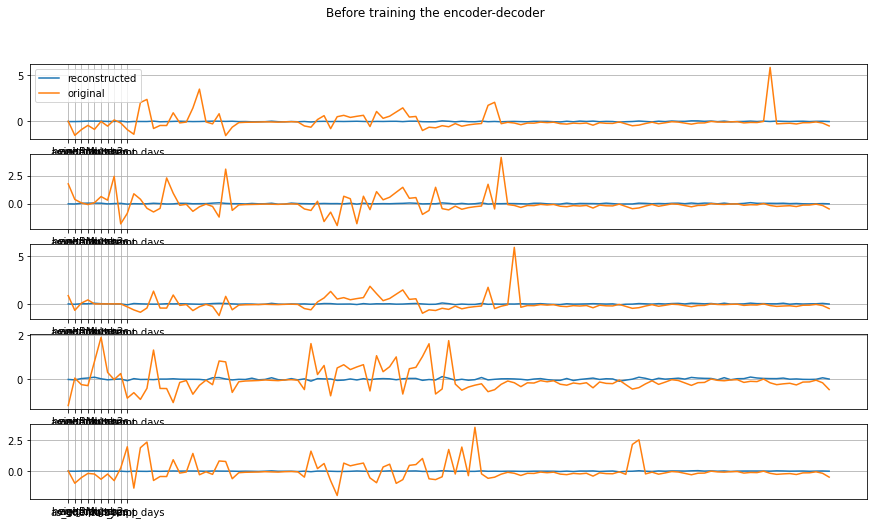

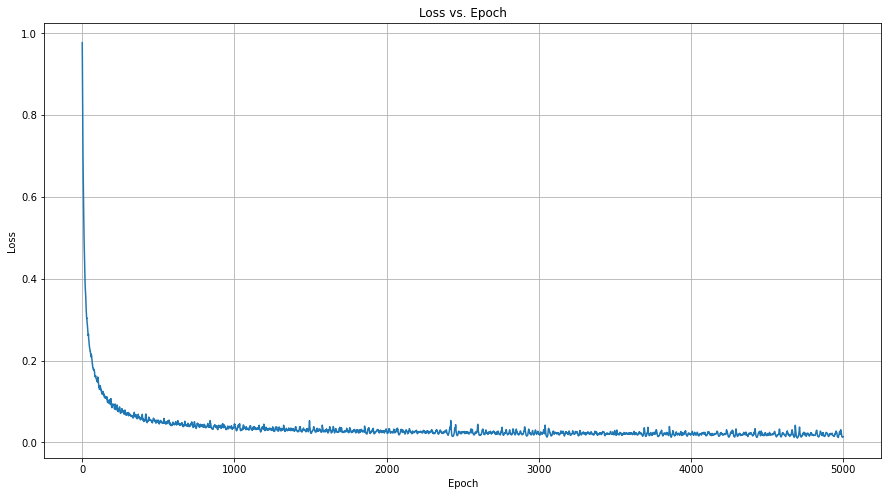

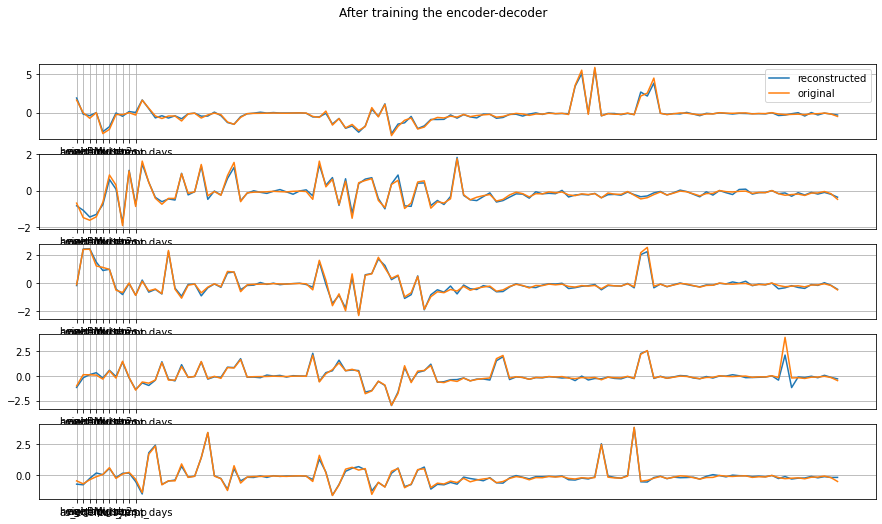

In [17]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 30 
encoder_30 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_30 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_30.input, outputs=decoder_30(encoder_30.output)) 
autoencoder.compile(loss='mse', optimizer='adam')
 
plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 35

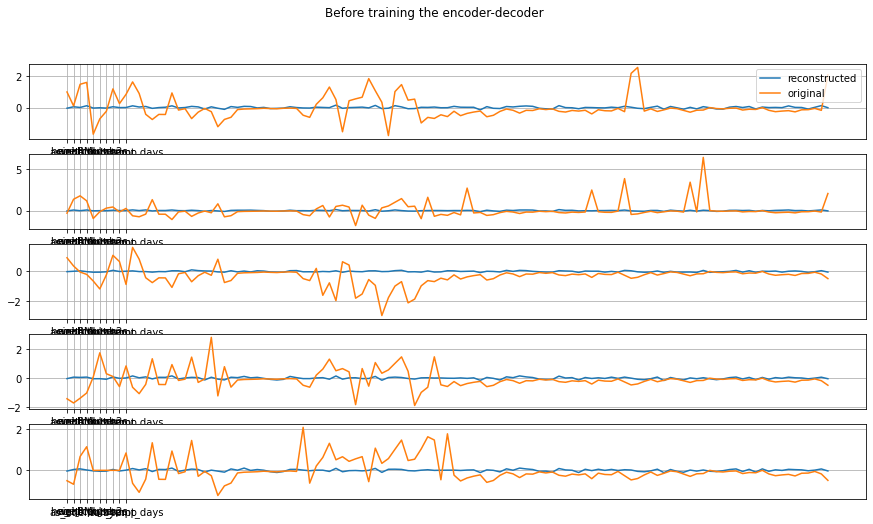

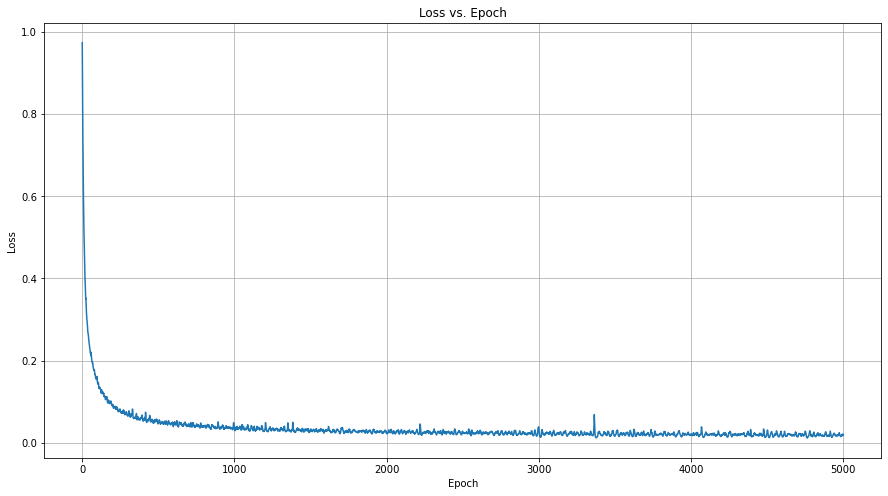

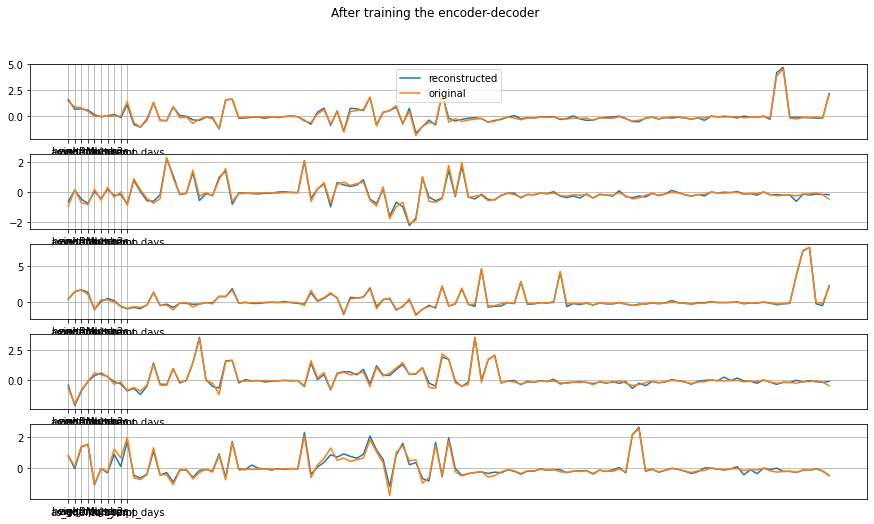

In [18]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 35 
encoder_35 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_35 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_35.input, outputs=decoder_35(encoder_35.output)) 
autoencoder.compile(loss='mse', optimizer='adam')
 
plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 40

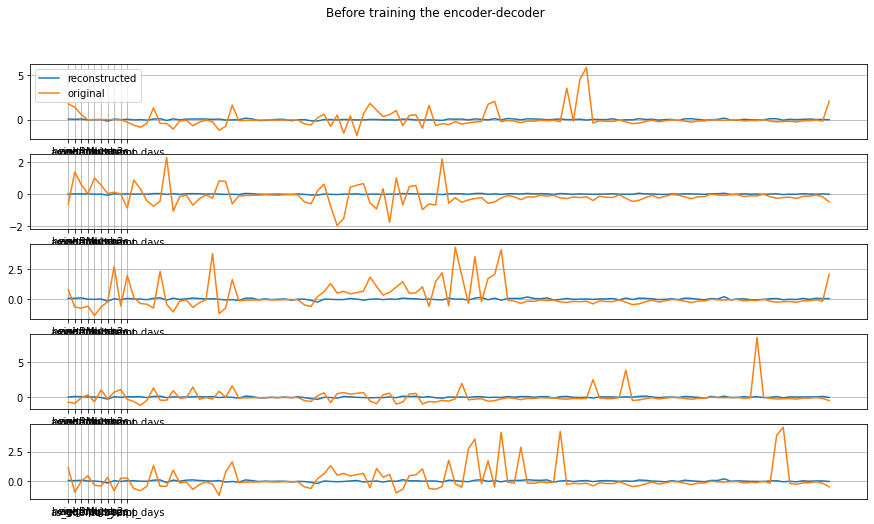

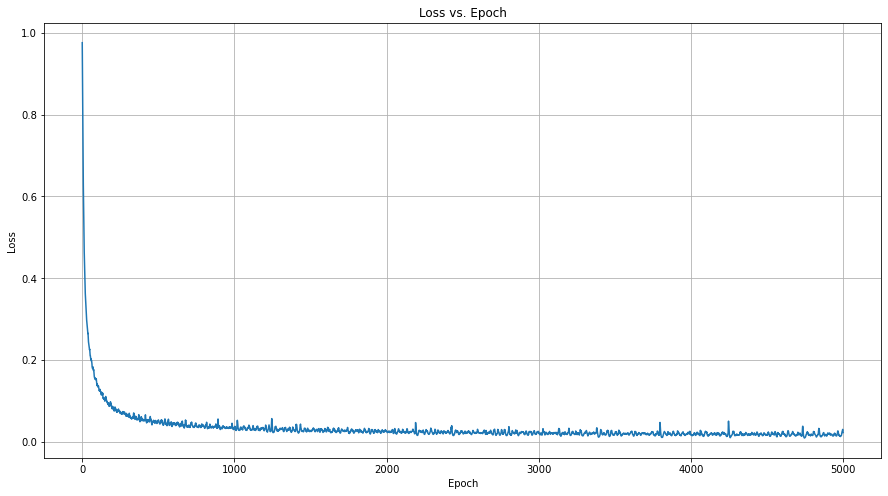

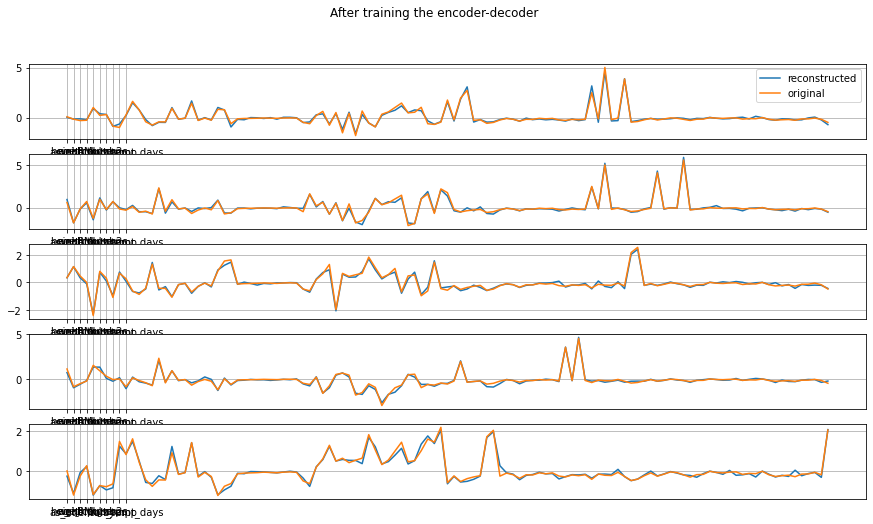

In [19]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 40 
encoder_40 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_40 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_40.input, outputs=decoder_40(encoder_40.output)) 
autoencoder.compile(loss='mse', optimizer='adam')
 
plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 45

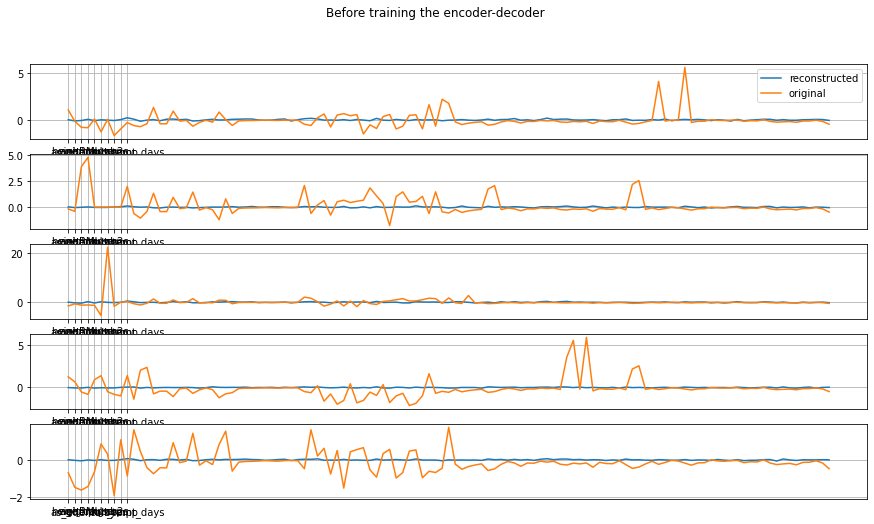

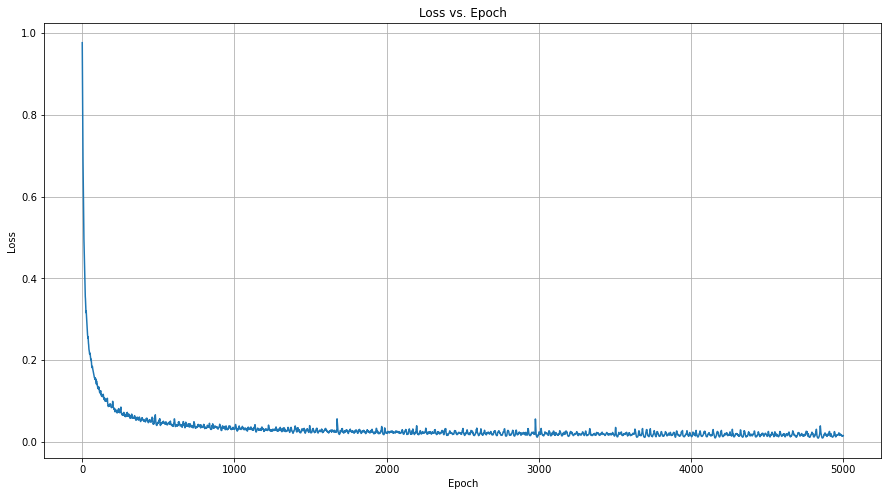

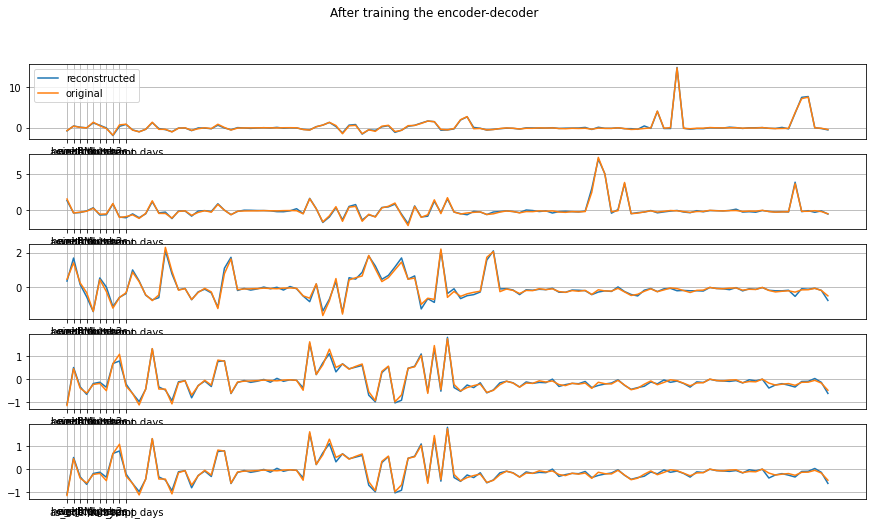

In [20]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 45 
encoder_45 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_45 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_45.input, outputs=decoder_45(encoder_45.output)) 
autoencoder.compile(loss='mse', optimizer='adam')

plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

### Number of Latent sapce == 50

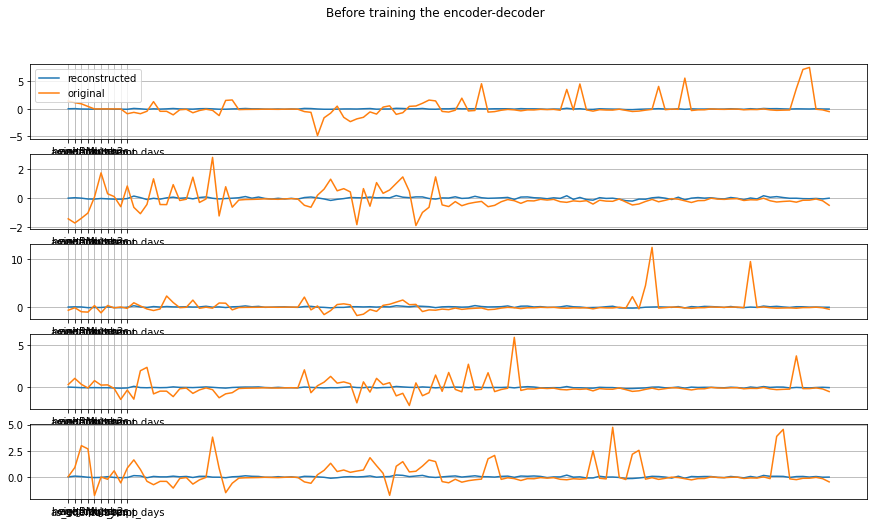

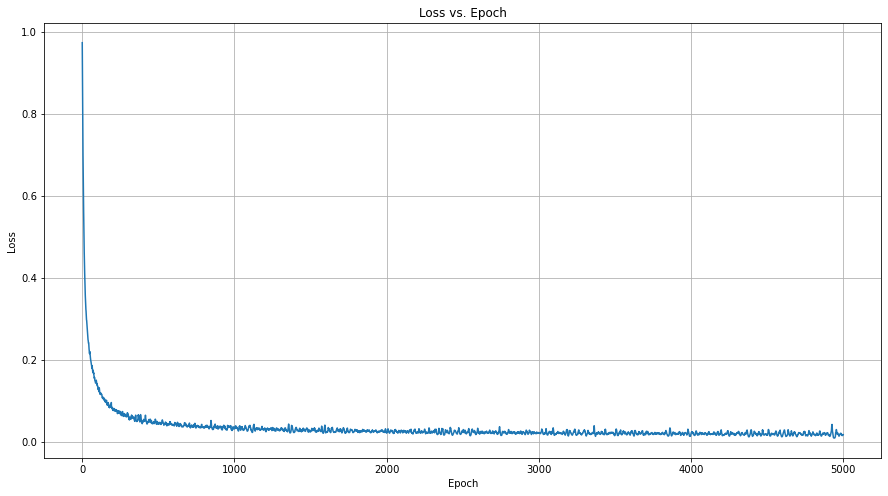

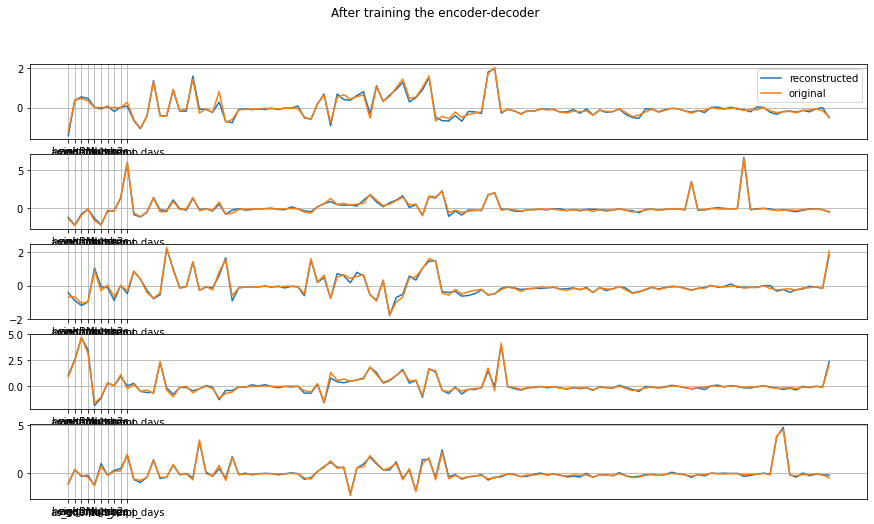

In [21]:
# This is the dimension of the original space 
input_dim = n_inputs 
# This is the dimension of the latent space (encoding space) 
latent_dim = 50 
encoder_50 = Sequential([ 
    Dense(128, activation='relu', input_shape=(input_dim,)), 
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(latent_dim, activation='relu') 
]) 
decoder_50 = Sequential([ 
    Dense(64, activation='relu', input_shape=(latent_dim,)), 
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'), 
    Dense(input_dim, activation=None) 
])

autoencoder = Model(inputs=encoder_50.input, outputs=decoder_50(encoder_50.output)) 
autoencoder.compile(loss='mse', optimizer='adam')

plot_orig_vs_recon('Before training the encoder-decoder')

model_history = autoencoder.fit(X_train, X_train, epochs=5000, batch_size=32, verbose=0)
fig = plt.figure(figsize=(15,8))
plt.plot(model_history.history["loss"]) 
plt.title("Loss vs. Epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epoch") 
plt.grid(True)
plot_orig_vs_recon('After training the encoder-decoder')

In [22]:
encoder_5.predict(X_train).squeeze()

array([[ 1.2889425 ,  0.97973514,  0.        ,  2.0805423 ,  0.        ],
       [ 1.9711521 ,  0.88345   ,  1.2488205 ,  0.11745295,  1.5146329 ],
       [ 2.067427  ,  3.1797006 , 11.34339   ,  6.054882  ,  3.742447  ],
       ...,
       [ 3.4191036 ,  7.4363995 ,  5.77796   ,  1.3615832 ,  0.8762156 ],
       [ 3.2448683 ,  1.817372  ,  6.078782  ,  4.790515  ,  0.80762994],
       [ 4.0378284 ,  2.0623624 ,  4.22883   ,  1.2461894 ,  0.02584946]],
      dtype=float32)

[[5.12195   5.002645  5.689302  6.1405954 5.716193 ]
 [2.83076   2.3858335 2.3790278 1.5326726 2.3299751]]


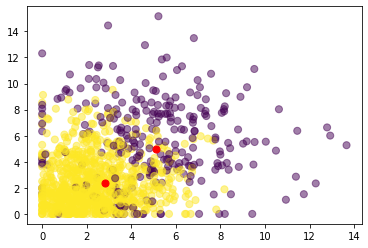

In [23]:
df5=pd.DataFrame(encoder_5.predict(X_train).squeeze())
df5.columns = ['feature_0',
               'feature_1',
               'feature_2',
               'feature_3',
               'feature_4']
df5

from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=2).fit(df5)
centroids5 = kmeans5.cluster_centers_
print(centroids5)

plt.scatter(df5['feature_1'], df5['feature_2'], c= kmeans5.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids5[:, 0], centroids5[:, 1], c='red', s=50)
plt.show()

df5.to_csv('encoder5.csv')

[[0.        1.3493992 1.8115809 1.2724841 1.7336738 0.        1.5419524
  1.4687786 1.5092847 1.7445369]
 [0.        3.9722872 3.38372   3.8257897 2.9177885 0.        4.196519
  2.8661113 2.52128   2.2594266]]


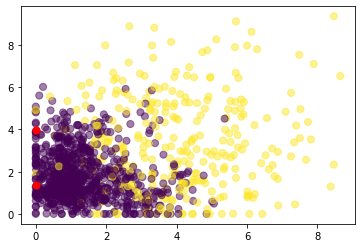

In [24]:
df10=pd.DataFrame(encoder_10.predict(X_train).squeeze())
df10.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9']
df10

from sklearn.cluster import KMeans
kmeans10 = KMeans(n_clusters=2).fit(df10)
centroids10 = kmeans10.cluster_centers_
print(centroids10)

plt.scatter(df10['feature_1'], df10['feature_2'], c= kmeans10.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids10[:, 0], centroids10[:, 1], c='red', s=50)
plt.show()

df10.to_csv('encoder10.csv')

[[1.07383    1.0411323  0.29893148 1.320874   1.7468793  2.4223661
  2.6560545  1.9940888  1.8381497  2.5625484  2.1499393  0.8581316
  2.022451   0.25419384 2.8444724 ]
 [1.1160034  1.1196259  0.64942116 1.3036627  1.0864182  1.4239075
  0.5471829  1.6606057  0.9965056  1.2425451  1.3212336  0.58809036
  1.2122611  0.56025535 0.8339724 ]]


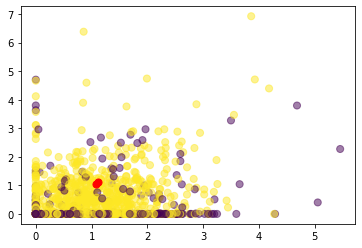

In [25]:
df15=pd.DataFrame(encoder_15.predict(X_train).squeeze())
df15.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14']
df15

from sklearn.cluster import KMeans
kmeans15 = KMeans(n_clusters=2).fit(df15)
centroids15 = kmeans15.cluster_centers_
print(centroids15)

plt.scatter(df15['feature_1'], df15['feature_2'], c= kmeans15.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids15[:, 0], centroids15[:, 1], c='red', s=50)
plt.show()

df15.to_csv('encoder15.csv')

[[0.8780811  0.9101707  1.1460823  0.8853972  1.1037518  1.2934923
  1.369525   0.8923922  1.1149335  0.39457074 0.01881442 0.6895569
  1.0166919  0.60027397 0.83285856 0.9101201  1.122509   1.0934689
  1.1734296  0.975358  ]
 [1.2941265  2.0935397  2.222055   2.1901405  1.7671323  1.3377115
  1.3928078  1.7739784  2.6360824  0.8679807  0.06127531 1.0013297
  1.8485802  0.92012227 0.9690156  1.7984684  1.1436049  1.005045
  2.0308018  1.8128072 ]]


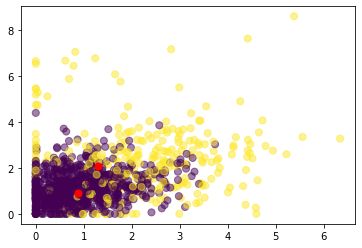

In [26]:
df20=pd.DataFrame(encoder_20.predict(X_train).squeeze())
df20.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19']
df20

from sklearn.cluster import KMeans
kmeans20 = KMeans(n_clusters=2).fit(df20)
centroids20 = kmeans20.cluster_centers_
print(centroids20)

plt.scatter(df20['feature_1'], df20['feature_2'], c= kmeans20.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids20[:, 0], centroids20[:, 1], c='red', s=50)
plt.show()

df20.to_csv('encoder20.csv')

[[7.4889505e-01 8.8490146e-01 1.2926459e+00 2.9289976e-02 1.0573421e+00
  7.6567781e-01 1.0161264e+00 9.4255292e-01 8.5257375e-01 8.5716999e-01
  2.6212409e-03 1.6842172e-01 6.8472672e-01 1.2719369e+00 9.7070724e-01
  7.5043797e-01 8.0798727e-01 9.4322264e-01 9.6971828e-01 9.5135081e-01
  1.0666991e+00 6.8552297e-01 8.9290738e-01 9.7006637e-01 8.9805287e-01]
 [7.7190351e-01 1.2746251e+00 1.7328026e+00 3.7390789e-01 1.8804100e+00
  8.0677909e-01 1.3581896e+00 9.6880114e-01 2.4971929e+00 1.1845312e+00
  1.1878045e-01 3.4827048e-01 1.2790548e+00 1.1613541e+00 1.0524839e+00
  2.8387494e+00 1.6762891e+00 1.3730731e+00 9.6641040e-01 2.3311203e+00
  1.6815314e+00 1.6723123e+00 1.3372134e+00 1.8011283e+00 2.4785900e+00]]


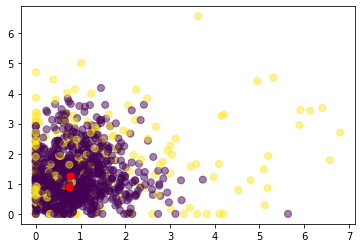

In [27]:
df25=pd.DataFrame(encoder_25.predict(X_train).squeeze())
df25.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19',
                'feature_20',
                'feature_21',
                'feature_22',
                'feature_23',
                'feature_24']
df25

from sklearn.cluster import KMeans
kmeans25 = KMeans(n_clusters=2).fit(df25)
centroids25 = kmeans25.cluster_centers_
print(centroids25)

plt.scatter(df25['feature_1'], df25['feature_2'], c= kmeans25.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids25[:, 0], centroids25[:, 1], c='red', s=50)
plt.show()

df25.to_csv('encoder25.csv')

[[1.2021226e+00 8.5003161e-01 9.6710956e-01 1.0063009e-01 1.1210948e+00
  5.5642200e-01 9.2477894e-01 9.2197412e-01 8.5739142e-01 0.0000000e+00
  0.0000000e+00 9.6205705e-01 9.6632373e-01 1.2211235e+00 8.3614212e-01
  1.0244859e+00 8.0295020e-01 1.0571855e+00 9.9229872e-01 4.5870161e-01
  6.7255574e-01 4.0698221e-01 8.9994657e-01 8.3176512e-01 4.4206017e-01
  5.6195420e-01 0.0000000e+00 1.6822472e-02 1.0807237e-01 1.0829662e+00]
 [1.2327021e+00 2.1501317e+00 9.7288400e-01 2.5119279e-02 1.7766317e+00
  7.9062217e-01 1.7929261e+00 1.0330654e+00 2.0522881e+00 0.0000000e+00
  0.0000000e+00 1.3254352e+00 1.1712534e+00 1.7468225e+00 1.7867382e+00
  1.8018496e+00 1.8465006e+00 1.4170575e+00 1.6222526e+00 2.7470332e-01
  1.8332252e-01 1.2469583e+00 1.1899760e+00 1.4993467e+00 1.4182864e+00
  5.1729000e-01 0.0000000e+00 4.6566129e-09 1.9880491e-01 1.3367672e+00]]


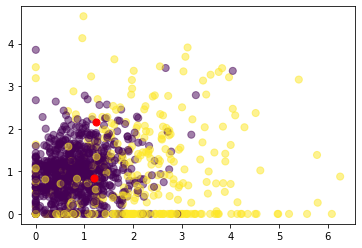

In [28]:
df30=pd.DataFrame(encoder_30.predict(X_train).squeeze())
df30.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19',
                'feature_20',
                'feature_21',
                'feature_22',
                'feature_23',
                'feature_24',
                'feature_25',
                'feature_26',
                'feature_27',
                'feature_28',
                'feature_29']
df30

from sklearn.cluster import KMeans
kmeans30 = KMeans(n_clusters=2).fit(df30)
centroids30 = kmeans30.cluster_centers_
print(centroids30)

plt.scatter(df30['feature_1'], df30['feature_2'], c= kmeans30.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids30[:, 0], centroids30[:, 1], c='red', s=50)
plt.show()

df30.to_csv('encoder30.csv')

[[0.07195036 0.74773    1.0358552  1.059094   0.89514977 0.90357935
  0.5849023  0.         0.0220407  0.48404127 1.022818   0.14881922
  0.         0.06229268 0.25562122 1.0403923  0.         0.8882315
  0.57365924 0.9363829  0.94064724 0.8371393  0.06674825 0.8795793
  0.8853217  0.18730493 0.81639034 0.62428105 0.9361006  0.73048544
  0.11084066 0.05844128 0.48995614 1.1573038  0.58715194]
 [0.20891374 2.3002694  1.6072365  1.6558168  1.8422089  2.3907528
  0.12534735 0.         0.00483259 0.33431774 1.4062343  0.26965263
  0.         0.10537153 0.8080444  0.7186901  0.         0.954354
  1.8257145  0.9002108  1.2449862  1.1125901  0.10852925 1.1862565
  1.4226699  0.01176836 0.4829892  0.8564729  1.6954231  1.4631972
  0.20395255 0.2647462  0.35157204 1.2643954  0.69531506]]


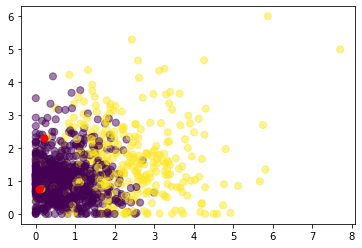

In [29]:
df35=pd.DataFrame(encoder_35.predict(X_train).squeeze())
df35.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19',
                'feature_20',
                'feature_21',
                'feature_22',
                'feature_23',
                'feature_24',
                'feature_25',
                'feature_26',
                'feature_27',
                'feature_28',
                'feature_29',
                'feature_30',
                'feature_31',
                'feature_32',
                'feature_33',
                'feature_34']
df35

from sklearn.cluster import KMeans
kmeans35 = KMeans(n_clusters=2).fit(df35)
centroids35 = kmeans35.cluster_centers_
print(centroids35)

plt.scatter(df35['feature_1'], df35['feature_2'], c= kmeans35.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids35[:, 0], centroids35[:, 1], c='red', s=50)
plt.show()

df35.to_csv('encoder35.csv')

[[0.4664187  0.10626974 0.72638947 0.7189522  0.         0.11294683
  0.05366475 0.6481597  0.35729355 0.22594316 0.58639866 0.10901244
  0.3731398  0.54296327 0.8010925  0.27404273 0.9317672  0.42903075
  0.4946514  0.15469657 0.34481356 0.7275342  0.7576987  0.06810063
  0.8374762  0.8488049  0.8731636  0.6147851  0.7185608  0.7957887
  0.17419985 0.3205     0.5375475  0.18648231 0.76118135 0.87084603
  0.7874695  1.0049236  0.07276692 0.97182655]
 [0.35409808 0.20365621 0.70547307 1.4170723  0.         0.31954348
  0.05416263 0.6842847  1.2961806  0.02199058 0.37684315 0.28620452
  0.34001583 1.9062536  1.3356194  0.06639817 1.6157067  0.7584241
  0.6035507  0.11641353 1.4873893  1.0756774  1.6459141  0.00392581
  1.2740109  1.9256861  0.5959481  1.3968551  1.0968838  1.4150527
  0.11689822 0.1909158  0.22642899 0.40504628 0.82804674 0.9275654
  1.0264848  1.566334   0.08754595 1.49849   ]]


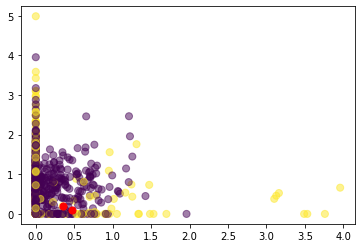

In [30]:
df40=pd.DataFrame(encoder_40.predict(X_train).squeeze())
df40.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19',
                'feature_20',
                'feature_21',
                'feature_22',
                'feature_23',
                'feature_24',
                'feature_25',
                'feature_26',
                'feature_27',
                'feature_28',
                'feature_29',
                'feature_30',
                'feature_31',
                'feature_32',
                'feature_33',
                'feature_34',
                'feature_35',
                'feature_36',
                'feature_37',
                'feature_38',
                'feature_39']
df40

from sklearn.cluster import KMeans
kmeans40 = KMeans(n_clusters=2).fit(df40)
centroids40 = kmeans40.cluster_centers_
print(centroids40)

plt.scatter(df40['feature_1'], df40['feature_2'], c= kmeans40.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids40[:, 0], centroids40[:, 1], c='red', s=50)
plt.show()

df40.to_csv('encoder40.csv')

[[0.31414878 0.3154502  0.8721058  0.68830085 0.02776453 0.78522944
  0.44467604 0.5748511  0.736139   1.5404568  1.3205152  0.03629532
  0.41635886 0.01757179 1.164782   1.2326035  1.6612248  0.07908708
  1.1859668  0.9633328  1.032227   0.08011398 1.2287259  1.5188996
  1.1079211  1.7045555  0.10283521 0.62587833 0.7204901  1.541913
  0.02991104 1.1896625  0.13387915 1.2761645  1.1771728  1.1755886
  1.0636097  0.07557972 0.07242091 0.03981603 0.         1.8468158
  1.4846737  1.1072291  0.88261056]
 [0.5011619  0.12133643 0.68673664 0.5305656  0.38990003 0.49163246
  0.26554042 0.9106634  0.81438106 0.7344662  0.7514449  0.02000203
  0.51612586 0.01421576 0.5604017  0.93371505 0.6467354  0.09250886
  0.8829184  0.47811761 0.72840935 0.02637217 0.55694664 0.76220536
  0.80207837 0.6191929  0.456291   0.73020184 0.5140772  0.74780834
  0.0142181  0.67724717 0.01115635 0.3827755  0.8000632  0.8745649
  0.9503723  0.00349744 0.01087202 0.01844845 0.         0.84848017
  0.6790452  0.914

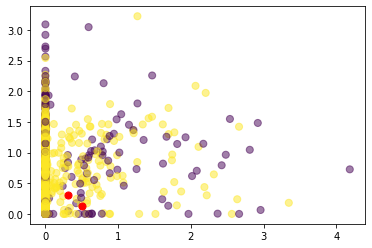

In [31]:
df45=pd.DataFrame(encoder_45.predict(X_train).squeeze())
df45.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19',
                'feature_20',
                'feature_21',
                'feature_22',
                'feature_23',
                'feature_24',
                'feature_25',
                'feature_26',
                'feature_27',
                'feature_28',
                'feature_29',
                'feature_30',
                'feature_31',
                'feature_32',
                'feature_33',
                'feature_34',
                'feature_35',
                'feature_36',
                'feature_37',
                'feature_38',
                'feature_39',
                'feature_40',
                'feature_41',
                'feature_42',
                'feature_43',
                'feature_44']
df45

from sklearn.cluster import KMeans
kmeans45 = KMeans(n_clusters=2).fit(df45)
centroids45 = kmeans45.cluster_centers_
print(centroids45)

plt.scatter(df45['feature_1'], df45['feature_2'], c= kmeans45.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids45[:, 0], centroids45[:, 1], c='red', s=50)
plt.show()

df45.to_csv('encoder45.csv')

[[5.4075193e-01 0.0000000e+00 6.3677466e-01 0.0000000e+00 6.2153733e-01
  1.5102338e+00 5.6291544e-01 1.6853541e-02 1.0518515e+00 1.3076904e+00
  3.3124769e-01 4.0038921e-02 7.7375376e-01 1.4787872e+00 1.8798797e+00
  2.4070546e-01 9.4071883e-01 1.5421031e+00 1.0438279e+00 3.7101883e-01
  1.0935316e+00 2.0459829e-01 1.0626585e+00 7.9785800e-01 8.1336886e-01
  1.4376512e+00 5.8207661e-10 1.9585387e-01 1.1602515e+00 6.8807852e-01
  0.0000000e+00 1.2261024e+00 1.0654707e+00 1.1219387e+00 1.3735680e-01
  1.1050088e+00 9.5538646e-02 9.8364770e-01 7.5993979e-01 1.5140492e-01
  7.5524986e-01 1.1914717e+00 0.0000000e+00 1.2809985e+00 1.4264001e-01
  1.6284040e-01 1.6121099e+00 7.8739458e-01 7.6878977e-01 1.0075048e+00]
 [2.3927718e-01 0.0000000e+00 1.5422106e-01 0.0000000e+00 1.9618151e-01
  7.4304199e-01 9.2845112e-02 7.9096377e-02 8.3593363e-01 7.0414615e-01
  5.5579531e-01 5.8475964e-02 7.3516709e-01 6.4229763e-01 3.6124903e-01
  7.9698376e-02 6.5438062e-01 6.9908512e-01 5.0885260e-01 1.257

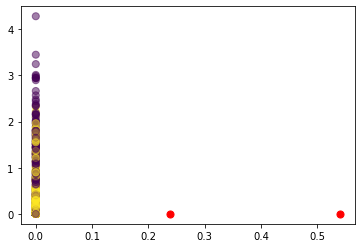

In [32]:
df50=pd.DataFrame(encoder_50.predict(X_train).squeeze())
df50.columns = ['feature_0',
                'feature_1',
                'feature_2',
                'feature_3',
                'feature_4',
                'feature_5',
                'feature_6',
                'feature_7',
                'feature_8',
                'feature_9',
                'feature_10',
                'feature_11',
                'feature_12',
                'feature_13',
                'feature_14',
                'feature_15',
                'feature_16',
                'feature_17',
                'feature_18',
                'feature_19',
                'feature_20',
                'feature_21',
                'feature_22',
                'feature_23',
                'feature_24',
                'feature_25',
                'feature_26',
                'feature_27',
                'feature_28',
                'feature_29',
                'feature_30',
                'feature_31',
                'feature_32',
                'feature_33',
                'feature_34',
                'feature_35',
                'feature_36',
                'feature_37',
                'feature_38',
                'feature_39',
                'feature_40',
                'feature_41',
                'feature_42',
                'feature_43',
                'feature_44',
                'feature_45',
                'feature_46',
                'feature_47',
                'feature_48',
                'feature_49']
df50

from sklearn.cluster import KMeans
kmeans50 = KMeans(n_clusters=2).fit(df50)
centroids50 = kmeans50.cluster_centers_
print(centroids50)

plt.scatter(df50['feature_1'], df50['feature_2'], c= kmeans50.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids50[:, 0], centroids50[:, 1], c='red', s=50)
plt.show()

df50.to_csv('encoder50.csv')